In [54]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import matplotlib.pyplot as plt
import joblib

In [55]:
df = pd.read_csv('../creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [57]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [58]:
# Downsampling

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [59]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [60]:
legit_sample = resample(legit,replace=False,n_samples=len(fraud),random_state=42)
df1 = pd.concat([legit_sample, fraud], axis=0)
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


In [61]:
df1['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [62]:
x = df1.drop(['Time','Class'], axis=1)
y = df1['Class']

In [63]:
print(len(x),len(y))

984 984


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)

(((738, 29), (738,)), ((246, 29), (246,)))

In [65]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [66]:
coefficients = model.coef_[0]
feature_names = x.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)

   Feature  Coefficient
0       V1     0.102174
1       V2    -0.056868
2       V3     0.132206
3       V4     0.995312
4       V5     0.092757
5       V6    -0.121425
6       V7     0.087331
7       V8    -0.680045
8       V9    -0.381248
9      V10    -0.774434
10     V11     0.373772
11     V12    -0.822650
12     V13    -0.332594
13     V14    -1.303472
14     V15     0.051483
15     V16    -0.505923
16     V17    -0.502519
17     V18    -0.216581
18     V19     0.052210
19     V20    -0.303896
20     V21    -0.160413
21     V22     0.390037
22     V23    -0.313578
23     V24    -0.267184
24     V25    -0.545617
25     V26    -0.404134
26     V27    -0.317529
27     V28     1.114069
28  Amount     0.001895


In [67]:
filename = 'logistic_regression_downsampling_model.joblib'
joblib.dump(model, filename)

['logistic_regression_downsampling_model.joblib']

In [68]:
y_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred, y_train)

In [69]:
print('Accuracy on Training data :', training_data_accuracy)

Accuracy on Training data : 0.9512195121951219


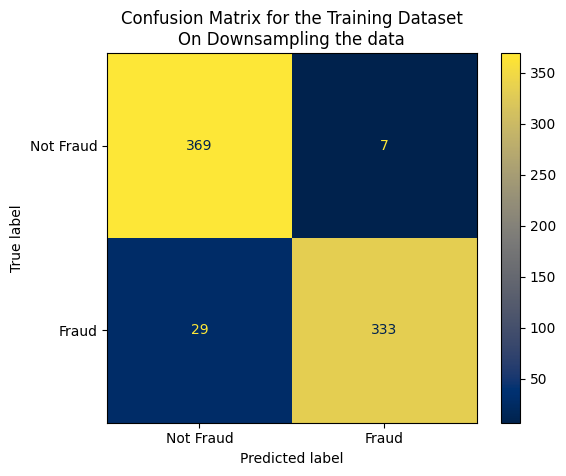

In [70]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='cividis')
plt.title('Confusion Matrix for the Training Dataset\nOn Downsampling the data')
plt.show();

In [71]:
y_test_pred = model.predict(x_test)
pd.value_counts(y_test_pred)

1    130
0    116
Name: count, dtype: int64

In [72]:
testing_data_accuracy = accuracy_score(y_test_pred, y_test)
print('Accuracy score on Test Data :', testing_data_accuracy)

Accuracy score on Test Data : 0.959349593495935


In [73]:
from sklearn.metrics import recall_score, f1_score, precision_score
print(recall_score(y_test_pred,y_test))
print(f1_score(y_test_pred,y_test))
print(precision_score(y_test_pred,y_test))

0.9615384615384616
0.9615384615384616
0.9615384615384616


In [74]:
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       116
           1       0.96      0.96      0.96       130

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



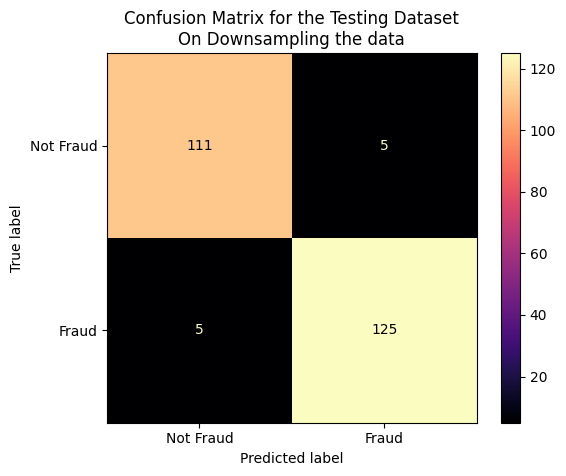

In [75]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='magma')
plt.title('Confusion Matrix for the Testing Dataset\nOn Downsampling the data')
plt.show();

In [76]:
# Upsampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

fraud = resample(fraud, replace=True, n_samples=len(non_fraud), random_state=42)

In [77]:
print(len(fraud),len(non_fraud))

284315 284315


In [78]:
df2=pd.concat([fraud,non_fraud])

In [79]:
x = df2.drop(['Time', 'Class'], axis=1)  
y = df2['Class'] 

In [80]:
print(len(x))
print(len(y))

568630
568630


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(454904, 29) (454904,)
(113726, 29) (113726,)


In [83]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454904 entries, 89370 to 237426
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      454904 non-null  float64
 1   V2      454904 non-null  float64
 2   V3      454904 non-null  float64
 3   V4      454904 non-null  float64
 4   V5      454904 non-null  float64
 5   V6      454904 non-null  float64
 6   V7      454904 non-null  float64
 7   V8      454904 non-null  float64
 8   V9      454904 non-null  float64
 9   V10     454904 non-null  float64
 10  V11     454904 non-null  float64
 11  V12     454904 non-null  float64
 12  V13     454904 non-null  float64
 13  V14     454904 non-null  float64
 14  V15     454904 non-null  float64
 15  V16     454904 non-null  float64
 16  V17     454904 non-null  float64
 17  V18     454904 non-null  float64
 18  V19     454904 non-null  float64
 19  V20     454904 non-null  float64
 20  V21     454904 non-null  float64
 21  V22     454

In [84]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
coefficients = model.coef_[0]
feature_names = x.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)

   Feature  Coefficient
0       V1     0.635539
1       V2     0.595582
2       V3     0.394221
3       V4     0.766549
4       V5     0.696742
5       V6    -0.554655
6       V7    -0.591365
7       V8    -0.401640
8       V9    -0.308635
9      V10    -0.717360
10     V11     0.560749
11     V12    -1.085401
12     V13    -0.356273
13     V14    -1.369979
14     V15    -0.081839
15     V16    -0.731086
16     V17    -0.814307
17     V18    -0.312640
18     V19     0.294791
19     V20    -0.836502
20     V21     0.016008
21     V22     0.682707
22     V23     0.444547
23     V24    -0.087395
24     V25     0.165274
25     V26    -0.393722
26     V27     0.048031
27     V28     0.846241
28  Amount     0.008443


In [86]:
filename = 'logistic_regression_upsampling_model.joblib'
joblib.dump(model, filename)

['logistic_regression_upsampling_model.joblib']

In [87]:
print(x_train.index)

Index([ 89370, 139997, 125800,  77682,  42609, 172787,  45203, 175494, 196481,
       243699,
       ...
       151103, 226814, 237547,  86155, 157868, 192382,  15751,  81722, 191359,
       237426],
      dtype='int64', length=454904)


In [88]:
y_train_pred=model.predict(x_train)

In [89]:
print("Accuracy on Training Data : ",accuracy_score(y_train,y_train_pred))
print("\nClassification Report :\n", classification_report(y_train, y_train_pred))


Accuracy on Training Data :  0.9487540228267942

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    227335
           1       0.98      0.92      0.95    227569

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904



In [90]:
print(recall_score(y_train,y_train_pred))
print(f1_score(y_train,y_train_pred))
print(precision_score(y_train,y_train_pred))

0.9205252033449196
0.947291070322286
0.9756600794563804


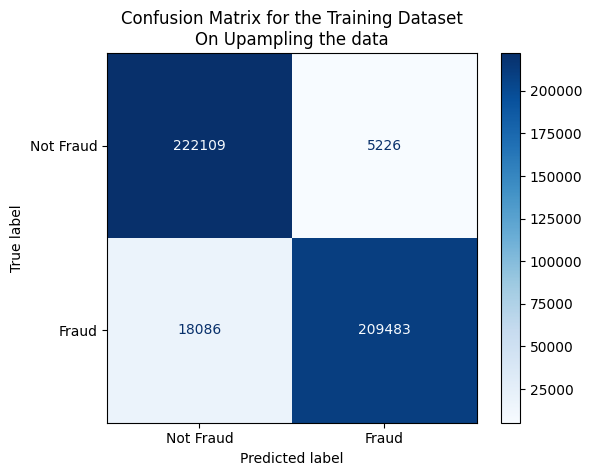

In [91]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for the Training Dataset\nOn Upampling the data')
plt.show();

In [92]:
y_test_pred=model.predict(x_test)

In [93]:
print("Accuracy on Testing Data : ",accuracy_score(y_test,y_test_pred))
print("\nClassification Report :\n", classification_report(y_test, y_test_pred))

Accuracy on Testing Data :  0.949879535022774

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56980
           1       0.98      0.92      0.95     56746

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



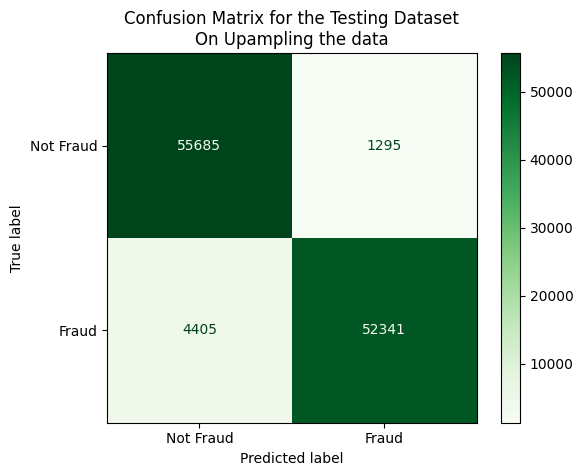

In [94]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for the Testing Dataset\nOn Upampling the data')
plt.show();